In [2]:
#KNN classifier
import pandas as pd
import numpy as np 
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score

In [3]:
merged_final_df = pd.read_csv("C:\\Users\\cosl5\\Downloads\\merged_df.csv")
merged_final_df.head()

,Unnamed: 0,Emotions,Path,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,2581,8,Crema\1015_IEO_ANG_HI.wav,-274.081064,90.553742,-1.319409,28.355147,-3.295721,4.588043,-4.467366,...,0.000086,0.000085,0.000080,0.000078,-0.016402,-0.013311,-0.054505,0.011296,0.012550,0.009563
1,6466,12,Crema\1062_IWL_HAP_XX.wav,-282.730691,71.540738,34.301680,11.759998,2.890566,-2.018548,-3.562313,...,0.000976,0.000892,0.000916,0.000897,0.041275,0.032079,0.008832,-0.025359,0.013441,0.032247
2,3673,5,Crema\1028_ITS_NEU_XX.wav,-391.468786,86.299907,44.825176,37.441880,12.426751,7.889423,0.606896,...,0.000043,0.000041,0.000043,0.000041,-0.005835,0.003289,-0.048369,-0.063204,0.011831,0.009074
3,21239,4,Tess\OAF_happy\OAF_kick_happy.wav,-471.930760,63.462643,13.026071,7.454551,7.756898,-2.243907,-15.625067,...,0.000437,0.000529,0.000278,0.000023,-0.005725,0.030310,-0.053869,-0.018939,-0.024129,-0.016006
4,8315,8,Crema\1085_IEO_ANG_LO.wav,-325.833235,65.936750,17.097764,19.950584,-0.243021,13.107857,4.477988,...,0.000144,0.000141,0.000145,0.000145,-0.008370,-0.026442,-0.042298,0.055370,-0.000482,0.018563


In [4]:
# Split your data into training and testing sets
merged_final_df_testing = merged_final_df.copy()

X_merged = merged_final_df_testing.drop(columns=['Unnamed: 0','Path','Emotions'], axis=1)
y_merged = merged_final_df_testing['Emotions']

In [6]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
X_ros, y_ros = ros.fit_resample(X_merged, y_merged)

# Split your data into training and testing sets
X_train_merged, X_test_merged, y_train_merged, y_test_merged = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_merged = scaler.fit_transform(X_train_merged)
X_test_merged = scaler.transform(X_test_merged)

In [8]:
k_values = range(1,10, 1)
cv_scores = []

for k in k_values:
    
    classifier = KNeighborsClassifier(n_neighbors=k,metric='manhattan')
    
    # Perform 10-fold cross-validation
    scores = cross_val_score(classifier, X_train_merged, y_train_merged, cv=15, scoring='accuracy')
    
    # Store the mean score
    cv_scores.append(scores.mean())

best_k_merged = k_values[np.argmax(cv_scores)]
best_score = max(cv_scores)

print(f'Optimal k: {best_k_merged} with Cross-Validation Accuracy: {best_score:.4f}')

Optimal k: 1 with Cross-Validation Accuracy: 0.7396


In [9]:
#Define the final model (Distance metric = manhattan)
classifier_merged_m = KNeighborsClassifier(n_neighbors=best_k_merged, metric='manhattan')

#Fit model
classifier_merged_m.fit(X_train_merged, y_train_merged)

y_pred_merged_m = classifier_merged_m.predict(X_test_merged)

In [15]:
#Define the final model (Distance metric = euclidean)
classifier_merged_e = KNeighborsClassifier(n_neighbors=best_k_merged, metric='euclidean')

#Fit model
classifier_merged_e.fit(X_train_merged, y_train_merged)

y_pred_merged_e = classifier_merged_e.predict(X_test_merged)

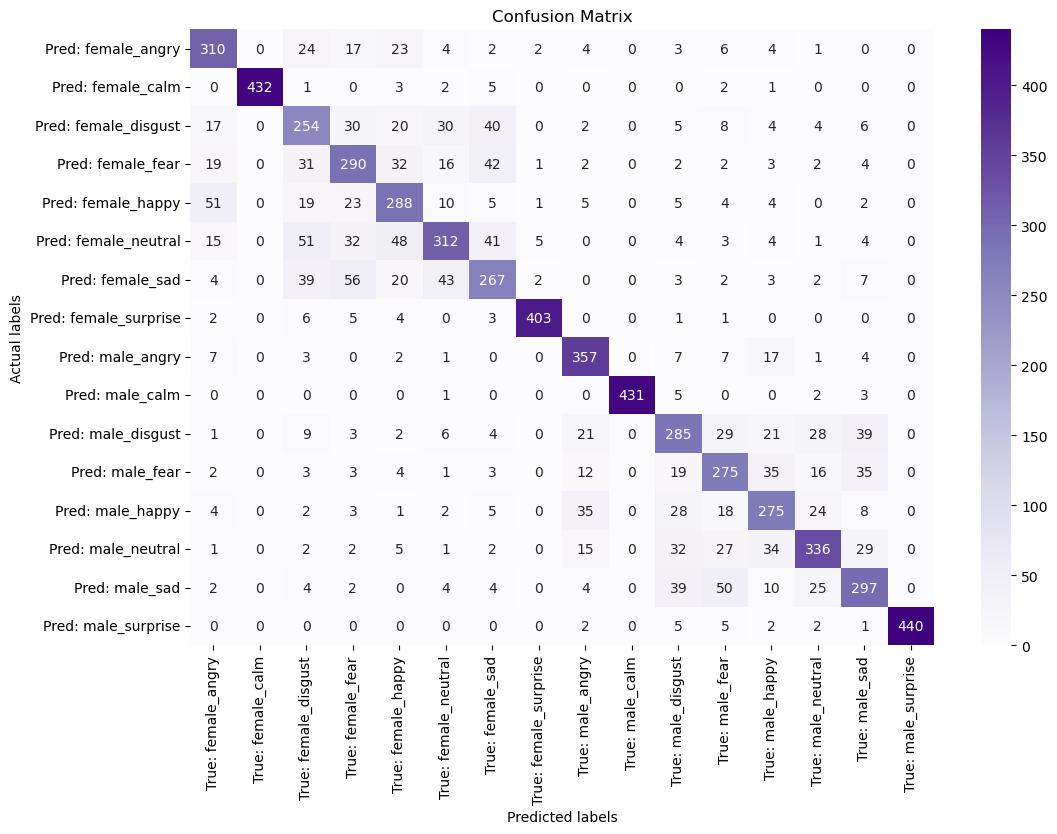

In [10]:
#confusion matrix for based on manhattan distance
confusion_merged = confusion_matrix(y_test_merged, y_pred_merged_m)

class_labels = [
    'female_angry', 'female_calm', 'female_disgust', 'female_fear', 
    'female_happy', 'female_neutral', 'female_sad', 'female_surprise', 
    'male_angry', 'male_calm', 'male_disgust', 'male_fear', 
    'male_happy', 'male_neutral', 'male_sad', 'male_surprise'
]

# Create a pandas DataFrame as you did, which is optional but useful for labeling.
confusion_merged_df = pd.DataFrame(confusion_merged.T, 
                            index=['Pred: ' + str(label) for label in class_labels], 
                            columns=['True: ' + str(label) for label in class_labels])

# Use Seaborn to create a heatmap from the DataFrame
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.heatmap(confusion_merged_df, annot=True, fmt='d', cmap='Purples')

plt.title('Confusion Matrix')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

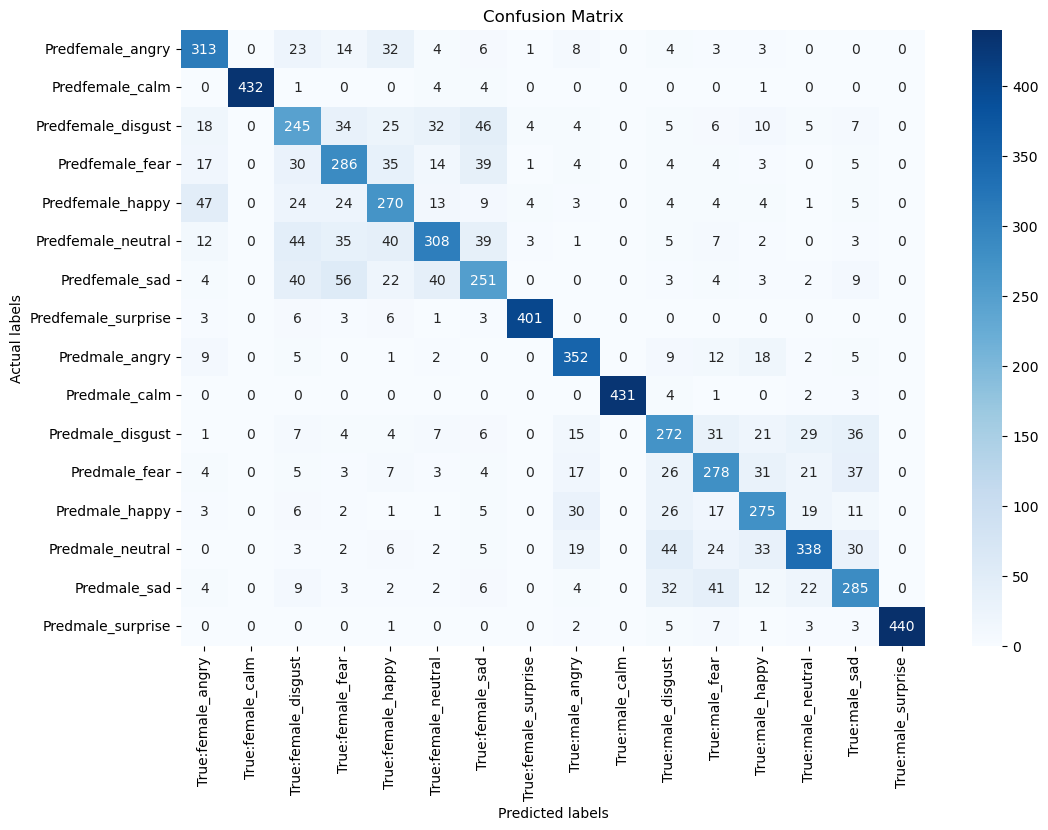

In [16]:
#confusion matrix for based on euclidean distance
confusion_merged = confusion_matrix(y_test_merged, y_pred_merged_e)

class_labels = [
    'female_angry', 'female_calm', 'female_disgust', 'female_fear', 
    'female_happy', 'female_neutral', 'female_sad', 'female_surprise', 
    'male_angry', 'male_calm', 'male_disgust', 'male_fear', 
    'male_happy', 'male_neutral', 'male_sad', 'male_surprise'
]

# Create a pandas DataFrame as you did, which is optional but useful for labeling.
confusion_merged_df = pd.DataFrame(confusion_merged.T, 
                            index=['Pred' + str(label) for label in class_labels], 
                            columns=['True:' + str(label) for label in class_labels])

# Use Seaborn to create a heatmap from the DataFrame
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.heatmap(confusion_merged_df, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

In [11]:
#f1_score based on manhattan distance
f1_merged_features_m = f1_score(y_test_merged, y_pred_merged_m, average = 'weighted')
print(f"\nf1_score:\n{f1_merged_features_m}")


f1_score:
0.7480490092435689


In [17]:
#f1_score based on euclidean distance
f1_merged_features_e = f1_score(y_test_merged, y_pred_merged_e, average = 'weighted')
print(f"\nf1_score:\n{f1_merged_features_e}")


f1_score:
0.7370430119312745


In [12]:
#accuracy based on manhattan distance
accuracy_merged_m = accuracy_score(y_test_merged, y_pred_merged_m)
print(f"\nAccuracy:\n{accuracy_merged_m}")


Accuracy:
0.7486813970064148


In [18]:
#accuracy based on euclidean distance
accuracy_merged_e = accuracy_score(y_test_merged, y_pred_merged_e)
print(f"\nAccuracy:\n{accuracy_merged_e}")


Accuracy:
0.7379900213827513


In [13]:
#report based on manhattan distance
report_merged_m = classification_report(y_test_merged, y_pred_merged_m)
print(f"\nReport:\n{report_merged_m}")


Report:
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       435
           1       0.97      1.00      0.98       432
           2       0.60      0.57      0.59       448
           3       0.65      0.62      0.64       466
           4       0.69      0.64      0.66       452
           5       0.60      0.72      0.65       433
           6       0.60      0.63      0.61       423
           7       0.95      0.97      0.96       414
           8       0.88      0.78      0.83       459
           9       0.98      1.00      0.99       431
          10       0.64      0.64      0.64       443
          11       0.67      0.63      0.65       439
          12       0.68      0.66      0.67       417
          13       0.69      0.76      0.72       444
          14       0.67      0.68      0.67       439
          15       0.96      1.00      0.98       440

    accuracy                           0.75      7015
   macro avg     

In [19]:
#report based on euclidean distance
report_merged_e = classification_report(y_test_merged, y_pred_merged_e)
print(f"\nReport:\n{report_merged_e}")


Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       435
           1       0.98      1.00      0.99       432
           2       0.56      0.55      0.55       448
           3       0.65      0.61      0.63       466
           4       0.66      0.60      0.63       452
           5       0.62      0.71      0.66       433
           6       0.58      0.59      0.59       423
           7       0.95      0.97      0.96       414
           8       0.85      0.77      0.81       459
           9       0.98      1.00      0.99       431
          10       0.63      0.61      0.62       443
          11       0.64      0.63      0.64       439
          12       0.69      0.66      0.68       417
          13       0.67      0.76      0.71       444
          14       0.68      0.65      0.66       439
          15       0.95      1.00      0.98       440

    accuracy                           0.74      7015
   macro avg     

In [14]:
#precision based on manhattan distance
precision_merged_features_m = precision_score(y_test_merged, y_pred_merged_m, average=None)
print(f"\nPrecision:\n{precision_merged_features_m}")


Precision:
[0.775      0.96860987 0.6047619  0.65022422 0.69064748 0.6
 0.59598214 0.94823529 0.87931034 0.97511312 0.63616071 0.67401961
 0.67901235 0.69135802 0.67346939 0.96280088]


In [20]:
#precision based on euclidean distance
precision_merged_features_e = precision_score(y_test_merged, y_pred_merged_e, average=None)
print(f"\nPrecision:\n{precision_merged_features_e}")


Precision:
[0.76155718 0.97737557 0.55555556 0.64705882 0.65533981 0.61723447
 0.57834101 0.94799054 0.84819277 0.97732426 0.62817552 0.63761468
 0.69444444 0.66798419 0.67535545 0.95238095]


In [22]:
aug_final_df = pd.read_csv("C:\\Users\\cosl5\\Downloads\\aug_final_df (1).csv")
aug_final_df.head()

,Emotions,Path,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,...,MEL124,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5
0,13,Ravdess\03-01-01-01-01-01-01.wav,-562.151506,31.979038,1.889848,8.659115,4.850125,-1.467678,-3.232874,-6.313390,...,0.000007,0.000005,0.000005,3.633485e-06,0.004597,0.015390,-0.033435,0.012520,-0.002898,0.007177
1,5,Ravdess\03-01-01-01-01-01-02.wav,-522.032804,30.843309,-6.888712,0.897592,-5.138569,-6.227784,-7.008630,-8.825021,...,0.000011,0.000011,0.000009,6.912152e-06,-0.021170,0.009388,0.005586,-0.013296,-0.003911,0.006994
2,13,Ravdess\03-01-01-01-01-01-03.wav,-561.167449,41.730094,-3.696491,5.630562,1.918353,-4.579504,-9.961748,-6.453885,...,0.000020,0.000028,0.000017,3.894878e-06,-0.005082,-0.004964,0.005950,0.021505,-0.008038,-0.009597
3,5,Ravdess\03-01-01-01-01-01-04.wav,-631.621801,33.719122,-7.336527,6.547586,-4.442126,-5.229694,-6.480212,-11.788281,...,0.000017,0.000012,0.000006,8.970399e-07,-0.007362,0.007175,-0.012972,0.007889,-0.013610,0.004167
4,13,Ravdess\03-01-01-01-01-01-05.wav,-532.558528,29.025310,9.827110,7.885900,3.647080,-1.234414,-3.232563,-3.385255,...,0.000011,0.000011,0.000010,9.498596e-06,0.008078,0.029084,-0.044486,0.003232,0.006687,0.003168


In [23]:
# Split your data into training and testing sets
aug_final_df_testing = aug_final_df.copy()

X_aug = aug_final_df_testing.drop(columns=['Path','Emotions'], axis=1)
y_aug = aug_final_df_testing['Emotions']

In [24]:
ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
X_ros, y_ros = ros.fit_resample(X_aug, y_aug)

# Split your data into training and testing sets
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

In [25]:
# Feature scaling
scaler = StandardScaler()
X_train_aug = scaler.fit_transform(X_train_aug)
X_test_aug = scaler.transform(X_test_aug)

In [26]:
#Finding the best number of neighbors for KNN
k_values = range(1,10, 1)
cv_scores = []

for k in k_values:
    
    classifier = KNeighborsClassifier(n_neighbors=k,metric='manhattan')
    
    # Perform 10-fold cross-validation
    scores = cross_val_score(classifier, X_train_aug, y_train_aug, cv=15, scoring='accuracy')
    
    # Store the mean score
    cv_scores.append(scores.mean())

best_k_aug = k_values[np.argmax(cv_scores)]
best_score = max(cv_scores)

print(f'Optimal k: {best_k_aug} with Cross-Validation Accuracy: {best_score:.4f}')

Optimal k: 1 with Cross-Validation Accuracy: 0.6990


In [27]:
#Define the final model (Distance metric = manhattan)
classifier_aug_m = KNeighborsClassifier(n_neighbors=best_k_aug, metric='manhattan')

#Fit model
classifier_aug_m.fit(X_train_aug, y_train_aug)

y_pred_aug_m = classifier_aug_m.predict(X_test_aug)

In [28]:
#Define the final model (Distance metric = euclidean)
classifier_aug_e = KNeighborsClassifier(n_neighbors=best_k_aug, metric='euclidean')

#Fit model
classifier_aug_e.fit(X_train_aug, y_train_aug)

y_pred_aug_e = classifier_aug_e.predict(X_test_aug)

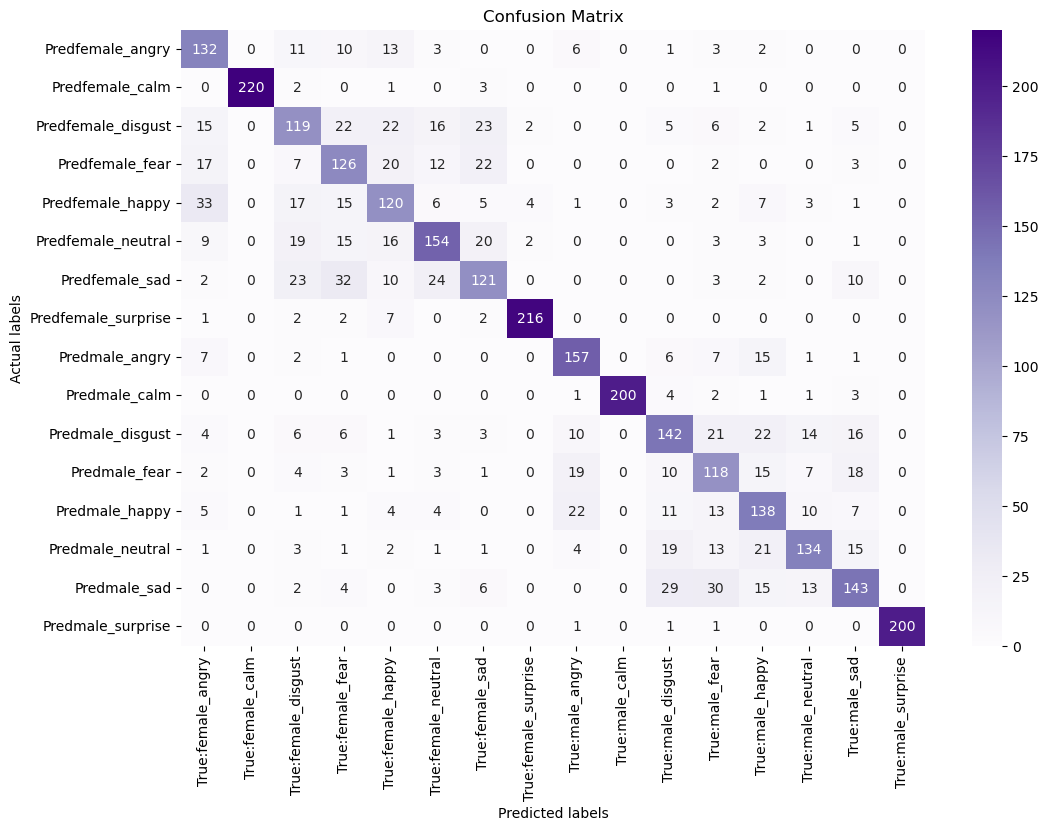

In [29]:
#confusion matrix for based on manhattan distance
confusion_aug = confusion_matrix(y_test_aug, y_pred_aug_m)

class_labels = [
    'female_angry', 'female_calm', 'female_disgust', 'female_fear', 
    'female_happy', 'female_neutral', 'female_sad', 'female_surprise', 
    'male_angry', 'male_calm', 'male_disgust', 'male_fear', 
    'male_happy', 'male_neutral', 'male_sad', 'male_surprise'
]

# Create a pandas DataFrame as you did, which is optional but useful for labeling.
confusion_aug_df = pd.DataFrame(confusion_aug.T, 
                            index=['Pred' + str(label) for label in class_labels], 
                            columns=['True:' + str(label) for label in class_labels])

# Use Seaborn to create a heatmap from the DataFrame
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.heatmap(confusion_aug_df, annot=True, fmt='d', cmap='Purples')

plt.title('Confusion Matrix')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

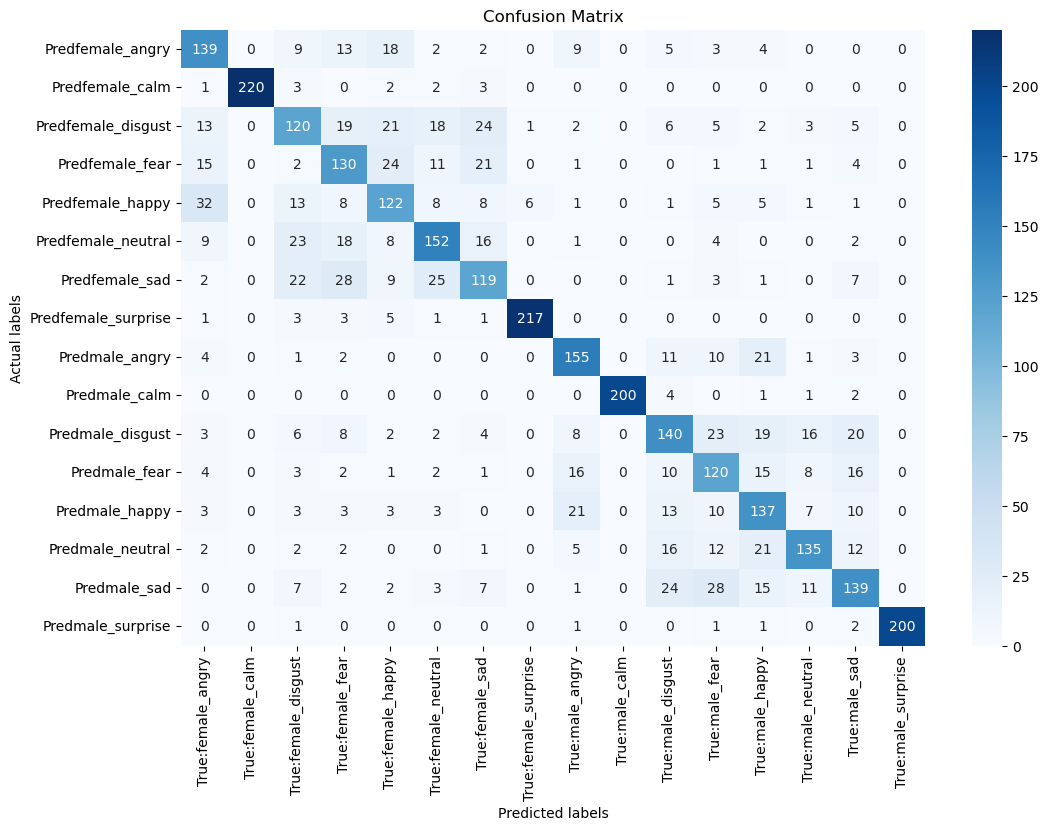

In [30]:
#confusion matrix for based on euclidean distance
confusion_aug = confusion_matrix(y_test_aug, y_pred_aug_e)

class_labels = [
    'female_angry', 'female_calm', 'female_disgust', 'female_fear', 
    'female_happy', 'female_neutral', 'female_sad', 'female_surprise', 
    'male_angry', 'male_calm', 'male_disgust', 'male_fear', 
    'male_happy', 'male_neutral', 'male_sad', 'male_surprise'
]

# Create a pandas DataFrame as you did, which is optional but useful for labeling.
confusion_aug_df = pd.DataFrame(confusion_aug.T, 
                            index=['Pred' + str(label) for label in class_labels], 
                            columns=['True:' + str(label) for label in class_labels])

# Use Seaborn to create a heatmap from the DataFrame
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.heatmap(confusion_aug_df, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

In [31]:
#f1-score for manhattan distance
f1_aug_features_m = f1_score(y_test_aug, y_pred_aug_m, average = 'weighted')
print(f"\nf1_score:\n{f1_aug_features_m}")


f1_score:
0.6944955574168954


In [32]:
#f1-score for euclidean distance
f1_aug_features_e = f1_score(y_test_aug, y_pred_aug_e, average = 'weighted')
print(f"\nf1_score:\n{f1_aug_features_e}")


f1_score:
0.6954141664461367


In [33]:
#accuracy for manhattan distance
accuracy_aug_m = accuracy_score(y_test_aug, y_pred_aug_m)
print(f"\nAccuracy:\n{accuracy_aug_m}")


Accuracy:
0.6955530216647663


In [34]:
#accuracy for euclidean distance
accuracy_aug_e = accuracy_score(y_test_aug, y_pred_aug_e)
print(f"\nAccuracy:\n{accuracy_aug_e}")


Accuracy:
0.6969783352337514


In [35]:
#precision for manhattan distance
precision_aug_features_m = precision_score(y_test_aug, y_pred_aug_m, average=None)
print(f"\nPrecision:\n{precision_aug_features_m}")


Precision:
[0.72928177 0.969163   0.5        0.60287081 0.55299539 0.63636364
 0.53303965 0.93913043 0.79695431 0.94339623 0.57258065 0.58706468
 0.63888889 0.62325581 0.58367347 0.98522167]


In [36]:
#precision for euclidean distance
precision_aug_features_e = precision_score(y_test_aug, y_pred_aug_e, average=None)
print(f"\nPrecision:\n{precision_aug_features_e}")


Precision:
[0.68137255 0.95238095 0.50209205 0.61611374 0.57819905 0.65236052
 0.5483871  0.93939394 0.74519231 0.96153846 0.55776892 0.60606061
 0.64319249 0.64903846 0.58158996 0.97087379]


In [37]:
#load clean non aug dataset
final_df = pd.read_csv("C:\\Users\\cosl5\\Downloads\\final_df.csv")
# drop first column
final_df.drop('Unnamed: 0', axis='columns', inplace=True)
final_df.head()

,Emotions_with_gender,Path,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,...,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5,Emotions_without_gender
0,13,Ravdess\03-01-01-01-01-01-01.wav,-697.79260,54.890040,0.663466,12.435786,7.733952,0.530750,-3.216631,-3.159394,...,0.000005,0.000004,3.206722e-07,-0.049044,0.020024,-0.018065,-0.064224,0.014611,0.006371,5
1,5,Ravdess\03-01-01-01-01-01-02.wav,-650.71090,54.477303,-9.090127,8.411754,-4.387536,-3.765706,-5.362752,-8.610381,...,0.000006,0.000004,3.992178e-07,-0.019344,0.012139,0.013491,-0.040532,0.006054,0.002813,5
2,13,Ravdess\03-01-01-01-01-01-03.wav,-614.73914,56.708190,-2.685535,10.650176,4.240806,-2.472097,-12.035720,-6.654510,...,0.000071,0.000045,4.472179e-06,-0.013746,-0.006525,0.013147,-0.001333,0.005258,-0.001753,5
3,5,Ravdess\03-01-01-01-01-01-04.wav,-695.85030,42.934265,-7.274557,8.977729,-4.170579,-4.924890,-6.537960,-12.679187,...,0.000013,0.000006,6.443871e-07,-0.006601,0.012613,-0.023542,0.016175,-0.010311,0.000834,5
4,13,Ravdess\03-01-01-01-01-01-05.wav,-713.43350,68.360940,7.989171,15.139791,11.715775,0.430983,1.002558,-2.773119,...,0.000002,0.000001,7.229193e-08,-0.023409,0.016632,-0.042659,0.019653,0.014472,0.010889,5


In [38]:
# Train-test split dataset for clean dataset
final_df_testing = final_df.copy()
X_clean = final_df_testing.drop(columns=['Path', 'Emotions_without_gender','Emotions_with_gender'], axis=1)
y_clean = final_df_testing['Emotions_with_gender']

#random over sampling
ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
X_ros, y_ros = ros.fit_resample(X_clean, y_clean)

# Split your data into training and testing sets
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

# Feature scaling for clean dataset
scaler = StandardScaler()
X_train_clean = scaler.fit_transform(X_train_clean)
X_test_clean = scaler.transform(X_test_clean)

In [39]:
# Find best n-neighbors for kNN (15 cv and manhattan)
k_values = range(1,10, 1)
cv_scores = []

for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    
    # Perform 15-fold cross-validation
    scores = cross_val_score(classifier, X_train_clean, y_train_clean, cv=15, scoring='accuracy')
    
    # Store the mean score
    cv_scores.append(scores.mean())

best_k_clean = k_values[np.argmax(cv_scores)]
best_score = max(cv_scores)

print(f'Optimal k: {best_k_clean} with Cross-Validation Accuracy: {best_score:.4f}')

Optimal k: 1 with Cross-Validation Accuracy: 0.7279


In [40]:
# Train KNN model using best n-neighbors found (manhattan)
classifier_clean = KNeighborsClassifier(n_neighbors=best_k_clean, metric='manhattan')
classifier_clean.fit(X_train_clean, y_train_clean)
y_pred_clean = classifier_clean.predict(X_test_clean)

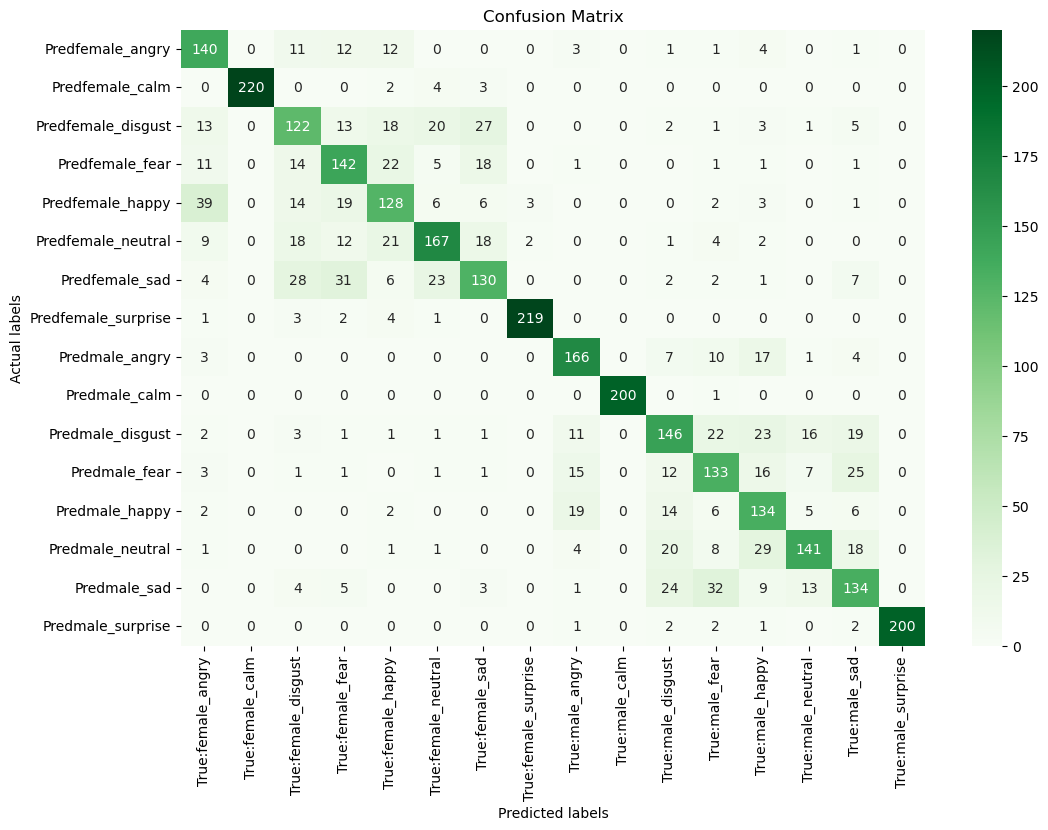

In [41]:
confusion_matrix_clean = confusion_matrix(y_test_clean, y_pred_clean)

class_labels = [
    'female_angry', 'female_calm', 'female_disgust', 'female_fear', 
    'female_happy', 'female_neutral', 'female_sad', 'female_surprise', 
    'male_angry', 'male_calm', 'male_disgust', 'male_fear', 
    'male_happy', 'male_neutral', 'male_sad', 'male_surprise'
]

# Create a pandas DataFrame as you did, which is optional but useful for labeling.
confusion_non_aug_clean_df = pd.DataFrame(confusion_matrix_clean.T, 
                            index=['Pred' + str(label) for label in class_labels], 
                            columns=['True:' + str(label) for label in class_labels])

# Use Seaborn to create a heatmap from the DataFrame
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.heatmap(confusion_non_aug_clean_df, annot=True, fmt='d', cmap='Greens')

plt.title('Confusion Matrix')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

In [42]:
f1_clean_features = f1_score(y_test_clean, y_pred_clean, average='weighted')
print(f'F1 Score: {f1_clean_features:.4f}')

F1 Score: 0.7179


In [43]:
# evaluate the model
accuracy_clean = accuracy_score(y_test_clean, y_pred_clean)
print(f'Accuracy: {accuracy_clean:.4f}')

Accuracy: 0.7189


In [44]:
#precision based on manhattan distance
precision_clean = precision_score(y_test_clean, y_pred_clean, average=None)
print(f"\nPrecision:\n{precision_clean}")


Precision:
[0.75675676 0.96069869 0.54222222 0.65740741 0.57918552 0.65748031
 0.55555556 0.95217391 0.79807692 0.99502488 0.59349593 0.61860465
 0.71276596 0.632287   0.59555556 0.96153846]


In [45]:
# Train KNN model using best n-neighbors found (euclidean)
classifier_clean = KNeighborsClassifier(n_neighbors=best_k_clean, metric='euclidean')
classifier_clean.fit(X_train_clean, y_train_clean)
y_pred_clean = classifier_clean.predict(X_test_clean)

In [46]:
# evaluate the model
accuracy_clean = accuracy_score(y_test_clean, y_pred_clean)
print(f'Accuracy: {accuracy_clean:.4f}')

Accuracy: 0.7166


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0b28ef1e-f6a6-4523-8903-70adcffed1c5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>